In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [33]:
Train_col_list=['order quantity', 
                'SPEC_1st_N', 
                'SPEC_1st_L1', 
                'SPEC_1st_L2',
                'SPEC_1st_L3', 
                'SPEC_2nd_L1',
                'SPEC_2nd_L2',
                'SPEC_2nd_L3',
                'Customer',
                'By_way',
                'Types',
                'Ap_outer_r',
                'Ap_L',
                'cen_outter_r',
                'cen_L',
                'cen_material',
                'Shell_outer_r_1',
                'Shell_outer_r_2',
                'shell_L',
                'shell_material',
                'Human_Hrs',
                'Material_Cost']

## Train to get human-hrs

In [34]:
9## load data ##
df_dir=r'data_train.pkl'
df= pd.read_pickle(df_dir)
## Pandas settings
pd.set_option('display.max_columns', None)
df.reset_index(inplace=True,drop=True)
df=df[Train_col_list]
q=df['Material_Cost'].quantile(0.99)
df=df[df['Material_Cost']<q]
df

,order quantity,SPEC_1st_N,SPEC_1st_L1,SPEC_1st_L2,SPEC_1st_L3,SPEC_2nd_L1,SPEC_2nd_L2,SPEC_2nd_L3,Customer,By_way,Types,Ap_outer_r,Ap_L,cen_outter_r,cen_L,cen_material,Shell_outer_r_1,Shell_outer_r_2,shell_L,shell_material,Human_Hrs,Material_Cost
0,1.0,625.0,X,X,S,A,M,N,UMC 8C,SEMI,國內終端,76.199997,204.0,44.000000,204.0,SUS420,76.199997,0.0,87.5,AL6061,0.0,0.0
1,1.0,625.0,X,X,S,A,M,N,UMC 8C,SEMI,國內終端,76.199997,204.0,44.000000,204.0,SUS420,76.199997,0.0,87.5,AL6061,0.0,0.0
2,1.0,30.0,X,X,S,W,M,R,AMAT,DISPLAY,國內設備商,128.000000,180.5,54.900002,180.5,SUS420,128.000000,0.0,121.0,SUS304,455.0,16083.0
3,1.0,625.0,X,X,S,A,M,N,UMC 8C,SEMI,國內終端,76.199997,204.0,44.000000,204.0,SUS420,76.199997,0.0,87.5,AL6061,0.0,0.0
4,1.0,625.0,X,X,S,A,M,N,UMC 8C,SEMI,國內終端,76.199997,204.0,44.000000,204.0,SUS420,76.199997,0.0,87.5,AL6061,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,2.0,40.0,A,X,S,C,N,R,AMAT,DISPLAY,國內設備商,170.000000,241.0,70.000000,241.0,SUS420,170.000000,0.0,127.0,SUS304,1070.0,26935.0
733,1.0,40.0,A,X,S,C,N,R,AMAT,DISPLAY,國內設備商,170.000000,241.0,70.000000,241.0,SUS420,170.000000,0.0,127.0,SUS304,1070.0,26935.0
734,1.0,40.0,A,X,S,C,N,R,AMAT,DISPLAY,國內設備商,170.000000,241.0,70.000000,241.0,SUS420,170.000000,0.0,127.0,SUS304,1070.0,26935.0
735,1.0,40.0,A,X,S,C,N,R,AMAT,DISPLAY,國內設備商,170.000000,241.0,70.000000,241.0,SUS420,170.000000,0.0,127.0,SUS304,1070.0,26935.0


In [35]:
def feature_col_clean_split (dataframe):
    
    from sklearn.preprocessing import MinMaxScaler
    numerical = dataframe.select_dtypes(exclude=['object'])
    numerical.fillna(0,inplace = True)
    numerical.round(4)
    categoric = dataframe.select_dtypes(include=['object'])
    categoric.fillna('NONE',inplace = True)
    dataframe = numerical.merge(categoric, left_index = True, right_index = True)
    
    dummies = pd.get_dummies(categoric,drop_first=True)
    
    data = pd.concat([numerical,dummies],axis=1)
    
    return data,numerical,categoric,dummies

In [36]:
data,num,cat,dum=feature_col_clean_split(df)

C:\Users\James\.conda\envs\data\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [37]:
dum.columns

Index(['SPEC_1st_L1_B', 'SPEC_1st_L1_D', 'SPEC_1st_L1_X', 'SPEC_1st_L2_C',
       'SPEC_1st_L2_F', 'SPEC_1st_L2_G', 'SPEC_1st_L2_K', 'SPEC_1st_L2_N',
       'SPEC_1st_L2_S', 'SPEC_1st_L2_X',
       ...
       'Types_國外終端', 'Types_國外設備商', 'cen_material_SUS304',
       'cen_material_SUS420', 'cen_material_SUS420+SUS304',
       'cen_material_SUS630', 'shell_material_SUS303', 'shell_material_SUS304',
       'shell_material_SUS316', 'shell_material_SUS316L'],
      dtype='object', length=114)

In [38]:
data

,order quantity,SPEC_1st_N,Ap_outer_r,Ap_L,cen_outter_r,cen_L,Shell_outer_r_1,Shell_outer_r_2,shell_L,Human_Hrs,Material_Cost,SPEC_1st_L1_B,SPEC_1st_L1_D,SPEC_1st_L1_X,SPEC_1st_L2_C,SPEC_1st_L2_F,SPEC_1st_L2_G,SPEC_1st_L2_K,SPEC_1st_L2_N,SPEC_1st_L2_S,SPEC_1st_L2_X,SPEC_1st_L3_H,SPEC_1st_L3_M,SPEC_1st_L3_S,SPEC_1st_L3_X,SPEC_2nd_L1_C,SPEC_2nd_L1_W,SPEC_2nd_L2_M,SPEC_2nd_L2_N,SPEC_2nd_L3_H,SPEC_2nd_L3_N,SPEC_2nd_L3_R,SPEC_2nd_L3_U,SPEC_2nd_L3_X,SPEC_2nd_L3_Z,Customer_AUOL6A,Customer_AUOL8A,Customer_CEAC,Customer_D&E,Customer_HONJI,Customer_INX-2,Customer_INX-4,Customer_INX-8,Customer_INX-T1,Customer_KJLC,Customer_TSMC-8,Customer_ULVAC,Customer_UMC 8AB,Customer_UMC 8C,Customer_UMC 8S,Customer_VPC,Customer_WaferTech,Customer_三豐機械,Customer_上海碩創,Customer_中研院,Customer_亞太竑,Customer_亞智,Customer_亮傑,Customer_俊尚科技,Customer_倍能真空,Customer_億碩,Customer_優貝克,Customer_兆遠科技,Customer_光頡科技,Customer_凌嘉,Customer_凌巨,Customer_力積電,Customer_力鼎精密,Customer_加高,Customer_北緯,Customer_南茂,Customer_吉利康,Customer_向新,Customer_和艦,Customer_天鴻,Customer_奈司特,Customer_宏達隆科技,Customer_崇文,Customer_工研院南院,Customer_巨孚,Customer_承德,Customer_承鋐儀器,Customer_捷永國際,Customer_新唐,Customer_日揚,Customer_旭騰,Customer_普鍍,Customer_永喬,Customer_海拓,Customer_清大,Customer_準鑫,Customer_漢民,Customer_漢磊-3,Customer_漢磊二廠,Customer_漢辰,Customer_璟茂,Customer_穩懋,Customer_竑新,Customer_聚昌,Customer_聚訊實業,Customer_聯穎光電,Customer_艾美瑞,Customer_貫旭,Customer_超延,Customer_鋆?,Customer_鋒鑫,Customer_鴻盛,By_way_INDUSTRIAL,By_way_LED,By_way_OTHERS,By_way_PV,By_way_SEMI,Types_國內終端,Types_國內設備商,Types_國外代理商,Types_國外終端,Types_國外設備商,cen_material_SUS304,cen_material_SUS420,cen_material_SUS420+SUS304,cen_material_SUS630,shell_material_SUS303,shell_material_SUS304,shell_material_SUS316,shell_material_SUS316L
0,1.0,625.0,76.199997,204.0,44.000000,204.0,76.199997,0.0,87.5,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1.0,625.0,76.199997,204.0,44.000000,204.0,76.199997,0.0,87.5,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1.0,30.0,128.000000,180.5,54.900002,180.5,128.000000,0.0,121.0,455.0,16083.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,1.0,625.0,76.199997,204.0,44.000000,204.0,76.199997,0.0,87.5,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,625.0,76.199997,204.0,44.000000,204.0,76.199997,0.0,87.5,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,2.0,40.0,170.000000,241.0,70.000000,241.0,170.000000,0.0,127.0,1070.0,26935.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# Set X and y

In [39]:
y=data['Material_Cost'].values
X=data.drop(['Material_Cost'],axis=1).values

### Train Test splitting 

In [40]:
from sklearn.model_selection import train_test_split
x0_train, X_test, y0_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val= train_test_split(x0_train, y0_train, test_size=0.1)
print(len(X_train), 'train dataset')
print(len(X_val), 'validation dataset')
print(len(X_test), 'test dataset')

590 train dataset
66 validation dataset
73 test dataset


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.fit_transform(X_val)
X_test=scaler.transform(X_test)

## Save Scaler
import joblib
joblib.dump(scaler,'x_scaler_Mcst.pkl')

['x_scaler_Mcst.pkl']

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
X_train.shape

(590, 124)

In [44]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


model=Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(254,activation='relu'))
model.add(Dense(254,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(254,activation='relu'))
model.add(Dense(254,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(X_train.shape[1],activation='relu'))

model.add((Dense(1)))
model.compile(optimizer='adam',loss='mse')

In [45]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=100)
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=512,
          epochs=2000,
          verbose=0,
          callbacks=[early_stop]
          )


Epoch 00296: early stopping


In [46]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 864x432 with 0 Axes>

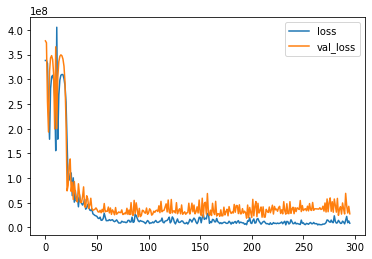

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
losses.plot()

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 124)               15500     
_________________________________________________________________
dense_20 (Dense)             (None, 254)               31750     
_________________________________________________________________
dense_21 (Dense)             (None, 254)               64770     
_________________________________________________________________
dense_22 (Dense)             (None, 508)               129540    
_________________________________________________________________
dense_23 (Dense)             (None, 508)               258572    
_________________________________________________________________
dense_24 (Dense)             (None, 508)               258572    
_________________________________________________________________
dense_25 (Dense)             (None, 1016)             

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [50]:
predictions=model.predict(X_test)

In [51]:
np.sqrt(mean_squared_error(y_test,predictions))

3175.2185

In [52]:
mean_absolute_error(y_test,predictions)

1355.8579

In [53]:
df['Material_Cost'].describe()

count      729.000000
mean     13604.521484
std      12869.418945
min          0.000000
25%       4498.000000
50%      10261.000000
75%      17981.000000
max      80629.000000
Name: Material_Cost, dtype: float64

In [54]:
explained_variance_score(y_test,predictions)

0.9517185688018799

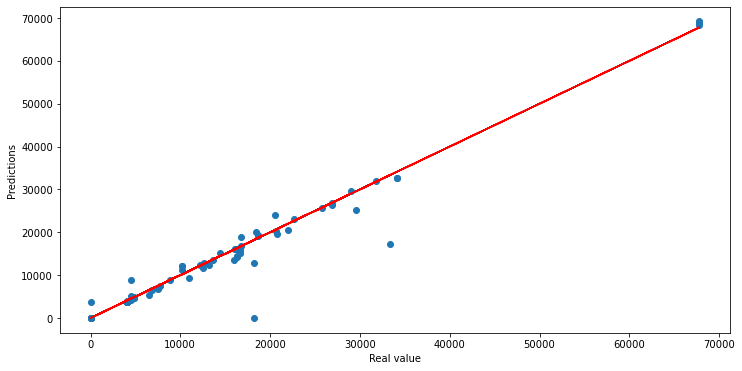

In [55]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.xlabel('Real value')
plt.ylabel('Predictions')
plt.show()

In [56]:
import numpy as np
i=np.random.randint(len(df), size=1)
material_cost=data.drop('Material_Cost',axis=1).iloc[i]

In [57]:
material_cost=scaler.transform(material_cost.values.reshape(-1,X_train.shape[1]))

In [58]:
model.predict(material_cost)

array([[3779.7092]], dtype=float32)

In [59]:
y_test.shape

(73,)

In [60]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

C:\Users\James\.conda\envs\data\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


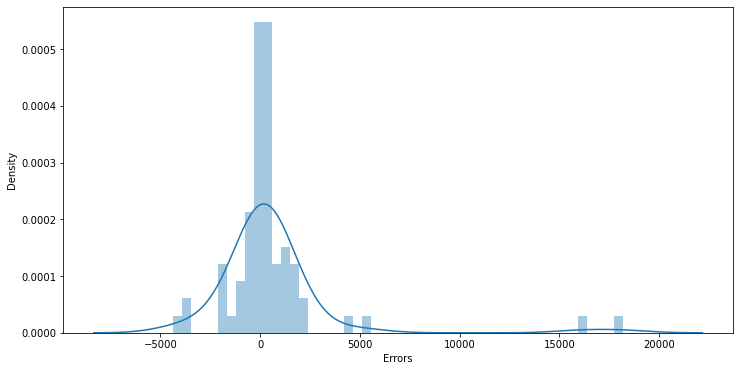

In [61]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.distplot(errors)
plt.xlabel('Errors')
plt.show()

In [31]:
#model.save('model_hr_084.h5')